In [1]:
from setup import *
import warnings
warnings.filterwarnings("ignore")

2023-04-03 14:54:19.425978: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 14:54:19.592645: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-03 14:54:19.592670: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-03 14:54:20.284491: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
train_path='Train'
valid_path='Valid'
batch_size=64
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(100,100), batch_size=batch_size)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(100,100), batch_size=batch_size)
steps_train=train_batches.n / batch_size
steps_valid=valid_batches.n / batch_size
num_classes= train_batches.num_classes
cls_train = train_batches.classes
cls_test = valid_batches.classes
class_names=list(train_batches.class_indices.keys())

def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]
    
image_paths_train=path_join(train_path, train_batches.filenames)
image_paths_test=path_join(valid_path, valid_batches.filenames)

Found 1046 images belonging to 2 classes.
Found 262 images belonging to 2 classes.


In [3]:
train_batches.class_indices.values()

dict_values([0, 1])

In [4]:
class_names

['MaskOff', 'MaskOn']

In [5]:
from plotting import *

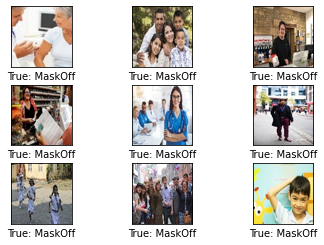

In [6]:
images=load_images(image_paths=image_paths_train[0:9])
cls_true=cls_train[0:9]   

plot_images(images=images, cls_true=cls_true, class_names=class_names, cls_pred=None, smooth=True )

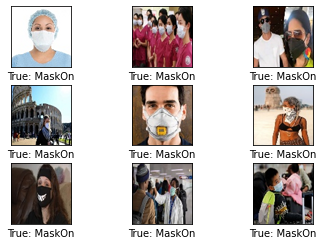

In [7]:
images=load_images(image_paths=image_paths_train[600:609])
cls_true=cls_train[600:609]   

plot_images(images=images, cls_true=cls_true, class_names=class_names, cls_pred=None, smooth=True )

In [8]:
# model  ==>  'MaskDetector.model'
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(num_classes,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

2023-04-03 14:54:41.701086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-03 14:54:41.701362: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hamda/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-03 14:54:41.701445: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hamda/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-03 14:54:41.701495: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load

In [9]:
epochs=15
model.compile(Adam(),loss="categorical_crossentropy", metrics=['accuracy'])
start=time.time()
history=model.fit_generator(generator=train_batches,epochs=epochs,steps_per_epoch=steps_train,
                           validation_data=valid_batches, validation_steps=steps_valid)
end=time.time()

Epoch 1/15
16/16 [==============================] - 8s 459ms/step - loss: 86.5419 - accuracy: 0.5402 - val_loss: 0.6839 - val_accuracy: 0.6031
Epoch 2/15
16/16 [==============================] - 7s 449ms/step - loss: 0.6764 - accuracy: 0.5889 - val_loss: 0.6834 - val_accuracy: 0.6221
Epoch 3/15
16/16 [==============================] - 7s 457ms/step - loss: 0.6213 - accuracy: 0.6482 - val_loss: 0.6788 - val_accuracy: 0.6031
Epoch 4/15
16/16 [==============================] - 9s 526ms/step - loss: 0.5576 - accuracy: 0.7161 - val_loss: 0.6653 - val_accuracy: 0.6336
Epoch 5/15
16/16 [==============================] - 7s 456ms/step - loss: 0.4473 - accuracy: 0.7849 - val_loss: 0.7349 - val_accuracy: 0.5954
Epoch 6/15
16/16 [==============================] - 7s 448ms/step - loss: 0.3569 - accuracy: 0.8528 - val_loss: 0.8723 - val_accuracy: 0.6145
Epoch 7/15
16/16 [==============================] - 7s 448ms/step - loss: 0.2684 - accuracy: 0.8967 - val_loss: 1.1870 - val_accuracy: 0.5687
Epoch

In [10]:
print(f"time : {end-start} s")
result=model.evaluate_generator(valid_batches, steps=1)
print("test accuracy : {0:.2f}".format(result[1]))

time : 119.52180814743042 s
test accuracy : 0.72


In [13]:
def plot_model_history(model_history):
    fig , axs=plt.subplots(1,2,figsize=(15,5))
    
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'] )
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    plt.show()

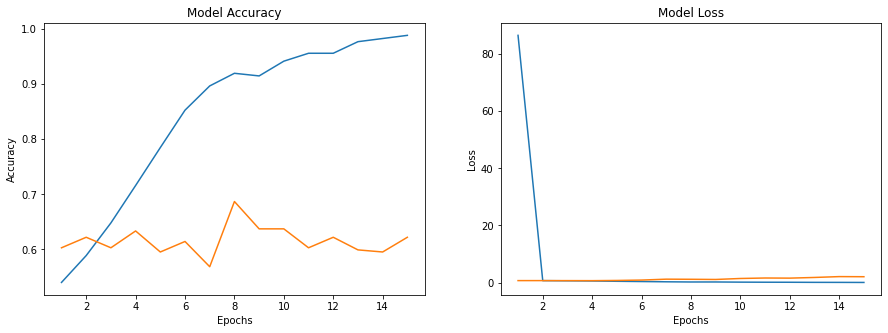

In [14]:
plot_model_history(history)

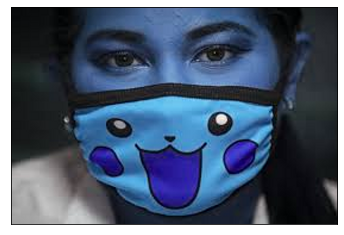

In [15]:
tt='cbiddxjkuflcqhqbzesnsbjaljwlxj.jpg'
image = cv2.imread("MaskImages/"+tt)
plt.imshow(image,interpolation='spline16')
plt.xticks([]) , plt.yticks([])
plt.show()

In [16]:
img=cv2.resize(image,(100,100))
img=np.reshape(img,(1,100,100,3))

predic=model.predict(img)
label = np.argmax(predic,axis=1)[0]
label

1/1 [==============================] - 0s 104ms/step


1

In [17]:
model.save('MaskDetector.model')

INFO:tensorflow:Assets written to: MaskDetector.model/assets


INFO:tensorflow:Assets written to: MaskDetector.model/assets
